# Importing Libraries and understanding data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
leads = pd.read_csv(r"E:\Course_4\new_updated\group\group_assignment (2)\group_assignment\Leads.csv")

In [3]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# performing EDA on the dataset
leads.isnull().sum()/len(leads.index) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# Data Cleaning

In [5]:
# Adding all the Column having select value to columnsWithSelectField array

columnsWithSelectField = []
for i in leads.columns:
    if leads[i].dtype == 'O':
        if 'Select' in leads[i].tolist():
            columnsWithSelectField.append(i)

          
    

In [6]:
print(columnsWithSelectField)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [7]:
# Converting the column with select value to nan values 

for i in columnsWithSelectField:
    leads[i] = leads[i].apply(lambda x : 'Others' if x == 'Select' else x)


In [8]:
# dropping the records which is having null > = 30%

refactored_leads = leads.loc[:,(leads.isnull().sum()/len(leads.index) * 100) < 30]

In [9]:
refactored_leads = refactored_leads.dropna()

In [10]:
refactored_leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [11]:
refactored_leads.shape

(4925, 31)

In [12]:
refactored_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 9239
Data columns (total 31 columns):
Prospect ID                                      4925 non-null object
Lead Number                                      4925 non-null int64
Lead Origin                                      4925 non-null object
Lead Source                                      4925 non-null object
Do Not Email                                     4925 non-null object
Do Not Call                                      4925 non-null object
Converted                                        4925 non-null int64
TotalVisits                                      4925 non-null float64
Total Time Spent on Website                      4925 non-null int64
Page Views Per Visit                             4925 non-null float64
Last Activity                                    4925 non-null object
Country                                          4925 non-null object
Specialization                                   4925 

In [13]:
# updated me supply # magazine, Receive More Updates About Our Courses , Get updates on DM Content ,I agree to pay the amount through cheque,Prospect ID,
# dropping the columns which doesn't hold any signifance for analysis 


refactored_leads.drop(['Get updates on DM Content','I agree to pay the amount through cheque','Receive More Updates About Our Courses','Magazine',
              'Prospect ID'], axis=1, inplace=True)


In [14]:
# new paper, 

refactored_leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   
6       660673  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   
6          No          1          2.0                         1640   

   Page Views Per Visit      Last Activity          ...           \
1                   2.5       Email Opened          ...            
2                   2.0       Email Opened          ...            
3                   1.0        Unreachable          ...            
4                   1.0  Converted to Lead          ...            
6                   2.0       Email Opened          ...            

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   
6                No                 No        No                    No   

  Through Recommendations Update me on Supply Chain Content    Lead Profile  \
1                      No                                No          Others   
2                      No                                No  Potential Lead   
3                      No                                No          Others   
4                      No                                No          Others   
6                      No                                No  Potential Lead   

     City A free copy of Mastering The Interview Last Notable Activity  
1  Others                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified  
6  Mumbai                                     No              Modified  

[5 rows x 26 columns]

In [15]:
columnvalue = np.array(refactored_leads.columns)

In [16]:
columnvalue

array(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Update me on Supply Chain Content', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype=object)

In [17]:
# update me on Supply chain Content has only No values , Through Recommendation is having only 7 yes records, Digital Adverstisement has only 4 yes,
# News Paper has only one yes records , X Education forums has only 1 yes record , News paper Article has only two yes record out of all records,
# Search has only 16 yes records , Do not call has only 2 yes records , So Removing all this columns


In [18]:
# dropping the above columns as it is not relavant for regression analysis

refactored_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations','Update me on Supply Chain Content'], axis=1,inplace=True)


In [19]:
refactored_leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   
6       660673  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   
6          1          2.0                         1640                   2.0   

       Last Activity Country           Specialization  \
1       Email Opened   India                   Others   
2       Email Opened   India  Business Administration   
3        Unreachable   India    Media and Advertising   
4  Converted to Lead   India                   Others   
6       Email Opened   India  Supply Chain Management   

  How did you hear about X Education What is your current occupation  \
1                             Others                      Unemployed   
2                             Others                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   
6                      Online Search                      Unemployed   

  What matters most to you in choosing a course    Lead Profile    City  \
1                       Better Career Prospects          Others  Others   
2                       Better Career Prospects  Potential Lead  Mumbai   
3                       Better Career Prospects          Others  Mumbai   
4                       Better Career Prospects          Others  Mumbai   
6                       Better Career Prospects  Potential Lead  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  
6                                     No              Modified

# Outliers Treatment

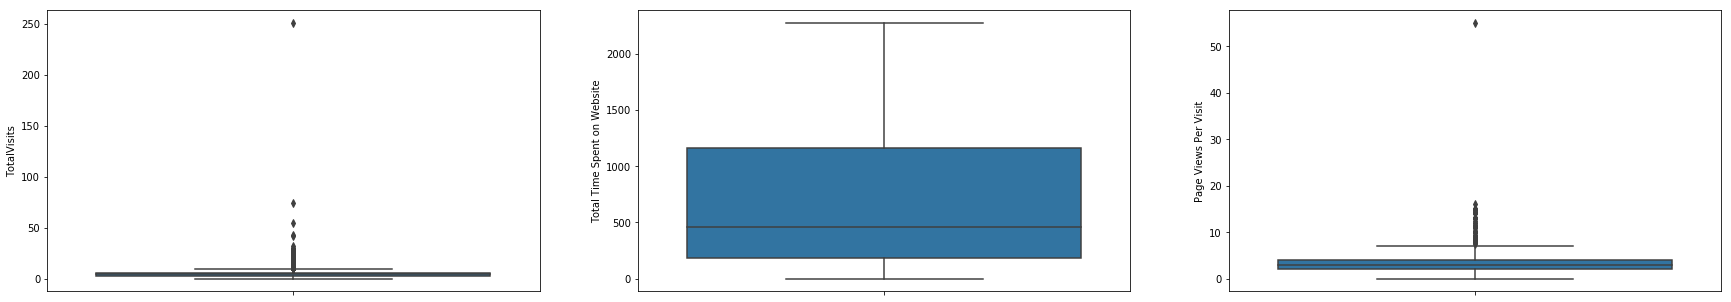

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(30, 30))
plt.subplot(5,3,1)
sns.boxplot(y = 'TotalVisits', data = refactored_leads)
plt.subplot(5,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = refactored_leads)
plt.subplot(5,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = refactored_leads)

In [22]:
## We see many outliers. Let's remove them

Q11 = refactored_leads.TotalVisits.quantile(0.25)
Q31 = refactored_leads.TotalVisits.quantile(0.75)
IQR1 = Q31 - Q11
refactored_leads = refactored_leads[(refactored_leads.TotalVisits > (Q11 - 1.5 * IQR1)) & (refactored_leads.TotalVisits < (Q31 + 1.5 * IQR1))]

Q12 = refactored_leads['Total Time Spent on Website'].quantile(0.25)
Q32 = refactored_leads['Total Time Spent on Website'].quantile(0.75)
IQR2 = Q32 - Q12
refactored_leads = refactored_leads[(refactored_leads['Total Time Spent on Website'] > (Q12 - 1.5 * IQR2)) & (refactored_leads['Total Time Spent on Website'] < (Q32 + 1.5 * IQR2))]

Q13 = refactored_leads['Page Views Per Visit'].quantile(0.25)
Q33 = refactored_leads['Page Views Per Visit'].quantile(0.75)
IQR3 = Q33 - Q13
refactored_leads = refactored_leads[(refactored_leads['Page Views Per Visit'] > (Q13 - 1.5 * IQR3)) & (refactored_leads['Page Views Per Visit']< (Q33 + 1.5 * IQR3))]

In [23]:
refactored_leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   
6       660673  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   
6          1          2.0                         1640                   2.0   

       Last Activity Country           Specialization  \
1       Email Opened   India                   Others   
2       Email Opened   India  Business Administration   
3        Unreachable   India    Media and Advertising   
4  Converted to Lead   India                   Others   
6       Email Opened   India  Supply Chain Management   

  How did you hear about X Education What is your current occupation  \
1                             Others                      Unemployed   
2                             Others                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   
6                      Online Search                      Unemployed   

  What matters most to you in choosing a course    Lead Profile    City  \
1                       Better Career Prospects          Others  Others   
2                       Better Career Prospects  Potential Lead  Mumbai   
3                       Better Career Prospects          Others  Mumbai   
4                       Better Career Prospects          Others  Mumbai   
6                       Better Career Prospects  Potential Lead  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  
6                                     No              Modified

# Binary encoding

In [24]:
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
refactored_leads[varlist] = refactored_leads[varlist].apply(binary_map)

In [25]:
refactored_leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   
6       660673  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   
6          1          2.0                         1640                   2.0   

       Last Activity Country           Specialization  \
1       Email Opened   India                   Others   
2       Email Opened   India  Business Administration   
3        Unreachable   India    Media and Advertising   
4  Converted to Lead   India                   Others   
6       Email Opened   India  Supply Chain Management   

  How did you hear about X Education What is your current occupation  \
1                             Others                      Unemployed   
2                             Others                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   
6                      Online Search                      Unemployed   

  What matters most to you in choosing a course    Lead Profile    City  \
1                       Better Career Prospects          Others  Others   
2                       Better Career Prospects  Potential Lead  Mumbai   
3                       Better Career Prospects          Others  Mumbai   
4                       Better Career Prospects          Others  Mumbai   
6                       Better Career Prospects  Potential Lead  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified  
6                                       0              Modified

# Dummy Variables handling

In [26]:
# create dummies for 'Lead Origin' , 'Lead Source' , 'Last Activity', 'Last Notable Activity'

dummy1 = pd.get_dummies(refactored_leads[['Lead Origin', 'Lead Source', 'Last Activity','Country',
    'Specialization','How did you hear about X Education','What is your current occupation', 'What matters most to you in choosing a course',
    'Lead Profile', 'City','A free copy of Mastering The Interview','Last Notable Activity' ]], drop_first=True)

# Adding the results to the master dataframe
refactored_leads = pd.concat([refactored_leads, dummy1], axis=1)

In [27]:
refactored_leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','Country',
    'Specialization','How did you hear about X Education','What is your current occupation', 'What matters most to you in choosing a course',
    'Lead Profile', 'City','A free copy of Mastering The Interview','Last Notable Activity' ],inplace=True,axis=1)

In [28]:
refactored_leads.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   
6       660673             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   
6                         1640                   2.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   
6                                    1                          0   

   Lead Source_Facebook  Lead Source_Google  \
1                     0                   0   
2                     0                   0   
3                     0                   0   
4                     0                   1   
6                     0                   1   

                          ...                          \
1                         ...                           
2                         ...                           
3                         ...                           
4                         ...                           
6                         ...                           

   Last Notable Activity_Email Opened  Last Notable Activity_Email Received  \
1                                   1                                     0   
2                                   1                                     0   
3                                   0                                     0   
4                                   0                                     0   
6                                   0                                     0   

   Last Notable Activity_Had a Phone Conversation  \
1                                               0   
2                                               0   
3                                               0   
4                                               0   
6                                               0   

   Last Notable Activity_Modified  \
1                               0   
2                               0   
3                               1   
4                               1   
6                               1   

   Last Notable Activity_Olark Chat Conversation  \
1                                              0   
2                                              0   
3                                              0   
4                                              0   
6                                              0   

   Last Notable Activity_Page Visited on Website  \
1                                              0   
2                                              0   
3                                              0   
4                                              0   
6                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   
6                               0                                  0   

   Last Notable Activity_Unsubscribed  \
1                                   0   
2                                   0   
3                                   0   
4                                   0   
6      

In [29]:
refactored_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4393 entries, 1 to 9239
Columns: 125 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(4), uint8(119)
memory usage: 750.8 KB


# Splitting data set into test and train data sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Putting feature variable to X
X = refactored_leads.drop(['Converted'], axis=1)

X.head()
X.shape

(4393, 124)

In [32]:
Y = refactored_leads['Converted']
Y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1318,)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Lead Number  Do Not Email  TotalVisits  Total Time Spent on Website  \
6157       602557             0     1.319838                     0.723086   
2090       639471             0    -0.353311                    -1.166408   
1507       644264             0     0.762122                    -0.646978   
3748       624284             0    -0.911027                    -1.052386   
2835       632439             0    -0.353311                     1.532093   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
6157              2.463346                                    1   
2090              0.139817                                    0   
1507             -0.247438                                    1   
3748             -1.409202                                    0   
2835              0.139817                                    0   

      Lead Origin_Lead Add Form  Lead Source_Facebook  Lead Source_Google  \
6157                          0                     0                   1   
2090                          0                     0                   1   
1507                          0                     0                   1   
3748                          0                     0                   0   
2835                          0                     0                   1   

      Lead Source_Olark Chat  \
6157                       0   
2090                       0   
1507                       0   
3748                       0   
2835                       0   

                             ...                          \
6157                         ...                           
2090                         ...                           
1507                         ...                           
3748                         ...                           
2835                         ...                           

      Last Notable Activity_Email Opened  \
6157                                   1   
2090                                   0   
1507                                   1   
3748                                   1   
2835                                   0   

      Last Notable Activity_Email Received  \
6157                                     0   
2090                                     0   
1507                                     0   
3748                                     0   
2835                                     0   

      Last Notable Activity_Had a Phone Conversation  \
6157                                               0   
2090                                               0   
1507                                               0   
3748                                               0   
2835                                               0   

      Last Notable Activity_Modified  \
6157                               0   
2090                               0   
1507                               0   
3748                               0   
2835                               0   

      Last Notable Activity_Olark Chat Conversation  \
6157                                              0   
2090                                              0   
1507                                              0   
3748                                              0   
2835                                              0   

      Last Notable Activity_Page Visited on Website  \
6157                                              0   
2090                                              0   
1507                                              0   
3748                                              0   
2835                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
6157                               0                                  0   
2090                               1                                  0   
1507                               0                                  0   
3748                               0     

In [37]:
### Checking the Churn Rate

(sum(refactored_leads['Converted'])/len(refactored_leads['Converted'].index)) * 100

43.25062599590257

In [38]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

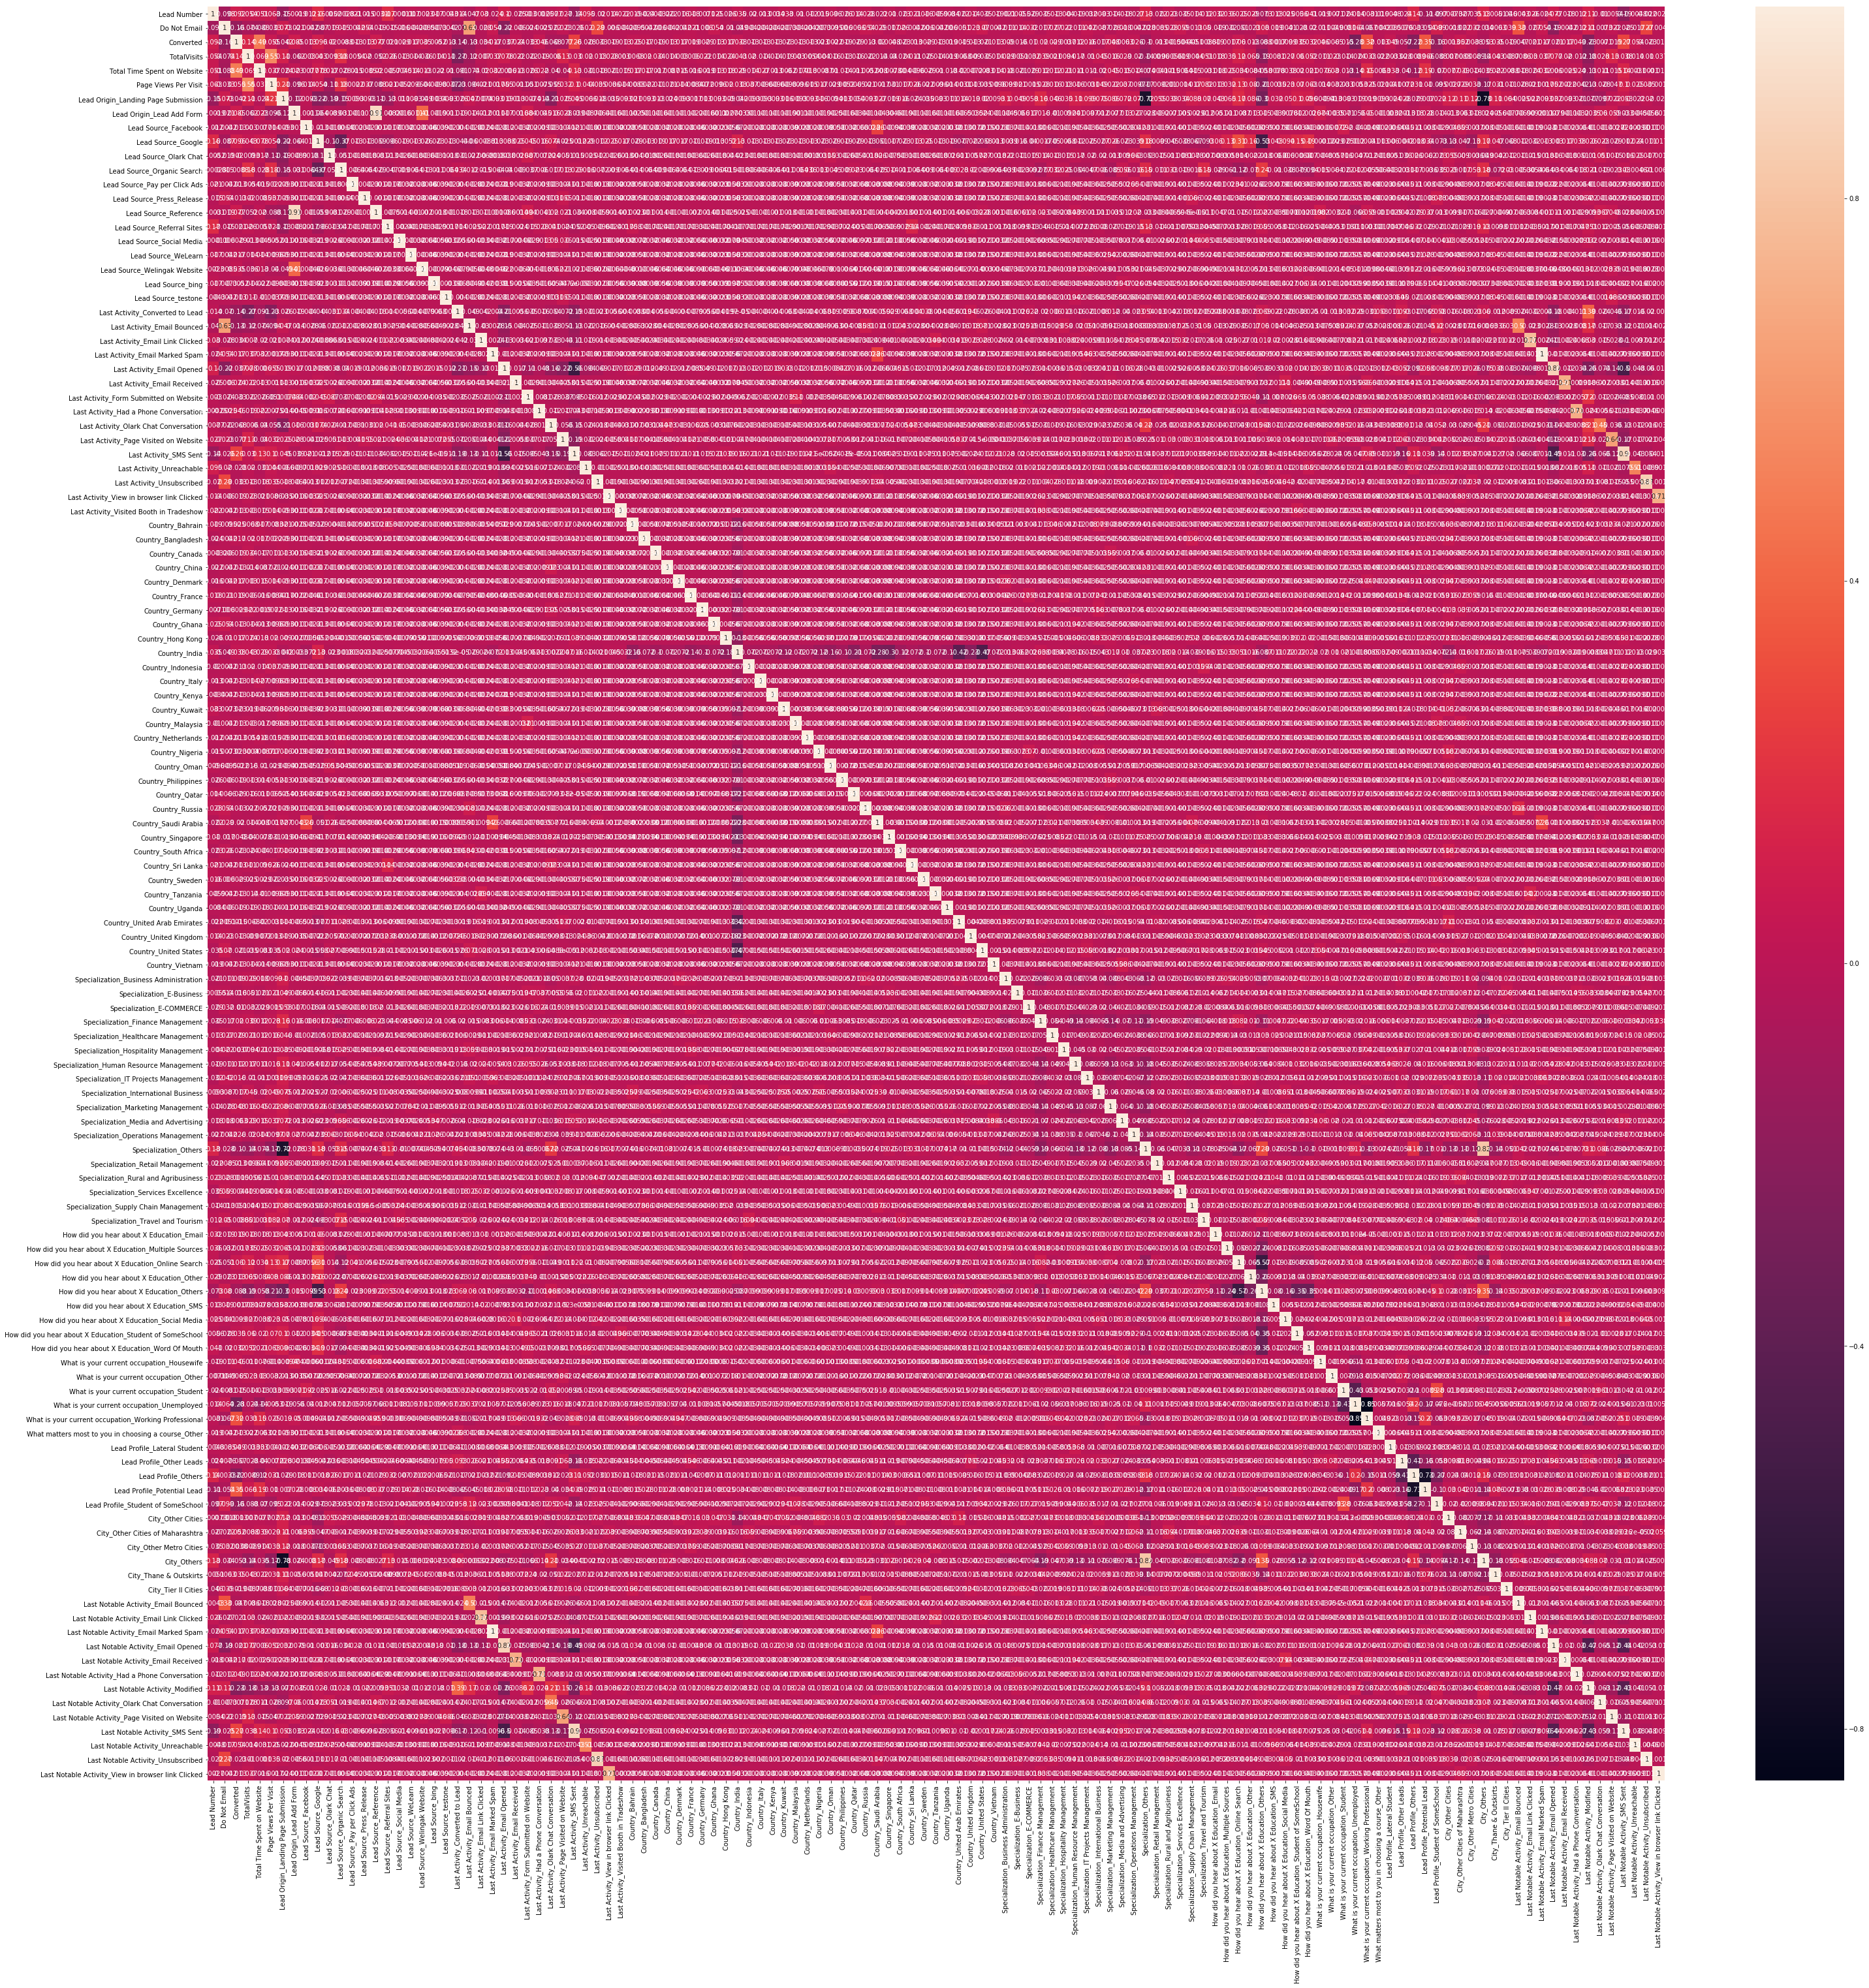

In [39]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(refactored_leads.corr(),annot = True)
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [41]:
x_lead_Number = X_train['Lead Number']

In [42]:
X_train.drop(['Lead Number'], axis=1,inplace=True)

# REF Feature Selection

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [44]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False])

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 51),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 65),
 ('Lead Source_Olark Chat', False, 26),
 ('Lead Source_Organic Search', False, 82),
 ('Lead Source_Pay per Click Ads', False, 73),
 ('Lead Source_Press_Release', False, 97),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 85),
 ('Lead Source_Social Media', False, 47),
 ('Lead Source_WeLearn', False, 102),
 ('Lead Source_Welingak Website', False, 41),
 ('Lead Source_bing', False, 12),
 ('Lead Source_testone', False, 100),
 ('Last Activity_Converted to Lead', False, 50),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 96),
 ('Last Activity_Email Marked Spam', False, 69),
 ('Last Activity_Email Opened', False, 7),
 ('Last

In [46]:
col = X_train.columns[rfe.support_]

In [47]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media',
       ...
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=103)

In [48]:
import statsmodels.api as sm

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3054
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:32:26   Pearson chi2:                 3.23e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1924      0.188     -1.023      0.306      -0.561       0.176
Do Not Email                                            -1.5617      0.268     -5.828      0.000      -2.087      -1.036
Total Time Spent on Website                              1.1357      0.054     21.145      0.000       1.030       1.241
Lead Origin_Landing Page Submission                     -0.8907      0.184     -4.831      0.000      -1.252      -0.529
Lead Origin_Lead Add Form                               38.7022   6.71e+07   5.77e-07      1.000   -1.32e+08    1.32e+08
Lead Source_Reference                                    0.3658   6.91e+07   5.29e-09      1.000   -1.35e+08    1.35e+08
Last Activity_Had a Phone Conversation                   1.8776      0.935      2.009      0.045       0.046       3.709
Last Activity_SMS Sent                                   1.1637      0.108     10.780      0.000       0.952       1.375
Last Activity_Unsubscribed                               1.3124      0.653      2.009      0.045       0.032       2.593
Country_France                                           1.7188      1.391      1.235      0.217      -1.008       4.446
Country_Italy                                          -42.4081   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Country_Netherlands                                    -41.7072   6.71e+07  -6.21e-07      1.000   -1.32e+08    1.32e+08
Country_Nigeria                                        -41.7329   4.75e+07  -8.79e-07      1.000    -9.3e+07     9.3e+07
Specialization_Others                                   -0.6970      0.204     -3.410      0.001      -1.098      -0.296
What is your current occupation_Housewife               38.4241   3.38e+07   1.14e-06      1.000   -6.63e+07    6.63e+07
What is your current occupation_Working Professional     2.7661      0.261     10.596      0.000       2.254       3.278
Lead Profile_Lateral Student                            38.6327   2.54e+07   1.52e-06      1.000   -4.97e+07    4.97e+07
Lead Profile_Potential Lead                              1.6003      0.127     12.625      0.000       1.352       1.849
Lead Profile_Student of SomeSchool                      -2.2673      0.542     -4.185      0.000      -3.329      -1.205
Last Notable Activity_Modified                          -0.7085      0.118     -6.008      0.000      -0.940      -0.477
Last Notable Activity_Unreachable                        1.8989      0.897      2.116      0.034       0.140       3.658
========================================================================================================================
"""

In [50]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6157    0.924440
2090    0.847584
1507    0.139694
3748    0.012719
2835    0.882297
5524    0.878571
9025    0.637343
1291    0.046914
119     0.082203
3518    0.938692
dtype: float64

In [51]:
y_train_pred = y_train_pred.values.reshape(-1)

In [52]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred ,'Lead_Number' : x_lead_Number})
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Number
6157          1        0.924440       602557
2090          1        0.847584       639471
1507          0        0.139694       644264
3748          0        0.012719       624284
2835          1        0.882297       632439

In [53]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].apply(lambda x : x*100)

In [54]:
X_train.shape

(3075, 123)

In [55]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.924440       602557   92.444002          1
2090          1        0.847584       639471   84.758386          1
1507          0        0.139694       644264   13.969438          0
3748          0        0.012719       624284    1.271886          0
2835          1        0.882297       632439   88.229748          1

In [56]:
from sklearn import metrics

In [57]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1494  247]
 [ 329 1005]]


In [58]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8126829268292682


# variance_inflation_factor   (VIF)

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                               Lead Source_Reference  18.04
3                           Lead Origin_Lead Add Form  18.03
2                 Lead Origin_Landing Page Submission   2.05
6                              Last Activity_SMS Sent   1.60
18                     Last Notable Activity_Modified   1.53
16                        Lead Profile_Potential Lead   1.33
12                              Specialization_Others   1.27
0                                        Do Not Email   1.22
14  What is your current occupation_Working Profes...   1.18
7                          Last Activity_Unsubscribed   1.10
1                         Total Time Spent on Website   1.10
17                 Lead Profile_Student of SomeSchool   1.08
13          What is your current occupation_Housewife   1.02
19                  Last Notable Activity_Unreachable   1.01
5              Last Activity_Had a Phone Conversation   1.01
11                                    Country_Nigeria   1.00
15                       Lead Profile_Lateral Student   1.00
9                                       Country_Italy   1.00
8                                      Country_France   1.00
10                                Country_Netherlands   1.00

In [61]:
col= col.drop('Lead Source_Reference',1)

In [62]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3055
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:32:51   Pearson chi2:                 3.23e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1924      0.188     -1.023      0.306      -0.561       0.176
Do Not Email                                            -1.5617      0.268     -5.828      0.000      -2.087      -1.036
Total Time Spent on Website                              1.1357      0.054     21.145      0.000       1.030       1.241
Lead Origin_Landing Page Submission                     -0.8907      0.184     -4.831      0.000      -1.252      -0.529
Lead Origin_Lead Add Form                               39.0222   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8776      0.935      2.009      0.045       0.046       3.709
Last Activity_SMS Sent                                   1.1637      0.108     10.780      0.000       0.952       1.375
Last Activity_Unsubscribed                               1.3124      0.653      2.009      0.045       0.032       2.593
Country_France                                           1.7188      1.391      1.235      0.217      -1.008       4.446
Country_Italy                                          -42.4081   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Country_Netherlands                                    -41.7072   6.71e+07  -6.21e-07      1.000   -1.32e+08    1.32e+08
Country_Nigeria                                        -41.7329   4.75e+07  -8.79e-07      1.000    -9.3e+07     9.3e+07
Specialization_Others                                   -0.6970      0.204     -3.410      0.001      -1.098      -0.296
What is your current occupation_Housewife               38.4576   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7661      0.261     10.596      0.000       2.254       3.278
Lead Profile_Lateral Student                            38.6328   2.54e+07   1.52e-06      1.000   -4.97e+07    4.97e+07
Lead Profile_Potential Lead                              1.6003      0.127     12.625      0.000       1.352       1.849
Lead Profile_Student of SomeSchool                      -2.2673      0.542     -4.185      0.000      -3.329      -1.205
Last Notable Activity_Modified                          -0.7085      0.118     -6.008      0.000      -0.940      -0.477
Last Notable Activity_Unreachable                        1.8989      0.897      2.116      0.034       0.140       3.658
========================================================================================================================
"""

In [63]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [64]:
y_train_pred[:10]

array([0.92444002, 0.84758386, 0.13969438, 0.01271886, 0.88229748,
       0.87857062, 0.63734282, 0.04691417, 0.08220316, 0.93869189])

In [65]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [66]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.924440       602557   92.444002          1
2090          1        0.847584       639471   84.758386          1
1507          0        0.139694       644264   13.969438          0
3748          0        0.012719       624284    1.271886          0
2835          1        0.882297       632439   88.229748          1

In [67]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8126829268292682


In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.05
5                              Last Activity_SMS Sent  1.60
17                     Last Notable Activity_Modified  1.53
15                        Lead Profile_Potential Lead  1.33
11                              Specialization_Others  1.27
0                                        Do Not Email  1.22
13  What is your current occupation_Working Profes...  1.18
6                          Last Activity_Unsubscribed  1.10
1                         Total Time Spent on Website  1.10
16                 Lead Profile_Student of SomeSchool  1.08
3                           Lead Origin_Lead Add Form  1.03
12          What is your current occupation_Housewife  1.02
18                  Last Notable Activity_Unreachable  1.01
4              Last Activity_Had a Phone Conversation  1.01
10                                    Country_Nigeria  1.00
14                       Lead Profile_Lateral Student  1.00
8                                       Country_Italy  1.00
7                                      Country_France  1.00
9                                 Country_Netherlands  1.00

In [69]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3055
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:33:05   Pearson chi2:                 3.23e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1924      0.188     -1.023      0.306      -0.561       0.176
Do Not Email                                            -1.5617      0.268     -5.828      0.000      -2.087      -1.036
Total Time Spent on Website                              1.1357      0.054     21.145      0.000       1.030       1.241
Lead Origin_Landing Page Submission                     -0.8907      0.184     -4.831      0.000      -1.252      -0.529
Lead Origin_Lead Add Form                               39.0222   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8776      0.935      2.009      0.045       0.046       3.709
Last Activity_SMS Sent                                   1.1637      0.108     10.780      0.000       0.952       1.375
Last Activity_Unsubscribed                               1.3124      0.653      2.009      0.045       0.032       2.593
Country_France                                           1.7188      1.391      1.235      0.217      -1.008       4.446
Country_Italy                                          -42.4081   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Country_Netherlands                                    -41.7072   6.71e+07  -6.21e-07      1.000   -1.32e+08    1.32e+08
Country_Nigeria                                        -41.7329   4.75e+07  -8.79e-07      1.000    -9.3e+07     9.3e+07
Specialization_Others                                   -0.6970      0.204     -3.410      0.001      -1.098      -0.296
What is your current occupation_Housewife               38.4576   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7661      0.261     10.596      0.000       2.254       3.278
Lead Profile_Lateral Student                            38.6328   2.54e+07   1.52e-06      1.000   -4.97e+07    4.97e+07
Lead Profile_Potential Lead                              1.6003      0.127     12.625      0.000       1.352       1.849
Lead Profile_Student of SomeSchool                      -2.2673      0.542     -4.185      0.000      -3.329      -1.205
Last Notable Activity_Modified                          -0.7085      0.118     -6.008      0.000      -0.940      -0.477
Last Notable Activity_Unreachable                        1.8989      0.897      2.116      0.034       0.140       3.658
========================================================================================================================
"""

In [70]:
col = col.drop('Lead Profile_Lateral Student', 1)

In [71]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3056
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:33:13   Pearson chi2:                 3.25e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1639      0.187     -0.877      0.381      -0.530       0.202
Do Not Email                                            -1.5395      0.264     -5.824      0.000      -2.058      -1.021
Total Time Spent on Website                              1.1384      0.054     21.234      0.000       1.033       1.243
Lead Origin_Landing Page Submission                     -0.9048      0.183     -4.937      0.000      -1.264      -0.546
Lead Origin_Lead Add Form                               38.9991   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8690      0.934      2.001      0.045       0.039       3.699
Last Activity_SMS Sent                                   1.1545      0.108     10.713      0.000       0.943       1.366
Last Activity_Unsubscribed                               1.2841      0.653      1.968      0.049       0.005       2.563
Country_France                                           1.7078      1.391      1.228      0.219      -1.018       4.434
Country_Italy                                          -42.4181   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Country_Netherlands                                    -41.7155   6.71e+07  -6.22e-07      1.000   -1.32e+08    1.32e+08
Country_Nigeria                                        -41.7270   4.75e+07  -8.79e-07      1.000    -9.3e+07     9.3e+07
Specialization_Others                                   -0.7203      0.204     -3.539      0.000      -1.119      -0.321
What is your current occupation_Housewife               38.4440   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7631      0.261     10.590      0.000       2.252       3.275
Lead Profile_Potential Lead                              1.5878      0.127     12.540      0.000       1.340       1.836
Lead Profile_Student of SomeSchool                      -2.2823      0.542     -4.212      0.000      -3.344      -1.220
Last Notable Activity_Modified                          -0.7099      0.118     -6.035      0.000      -0.940      -0.479
Last Notable Activity_Unreachable                        1.8903      0.898      2.106      0.035       0.131       3.650
========================================================================================================================
"""

In [72]:

y_train_pred = res.predict(X_train_sm).values.reshape(-1)


y_train_pred[:10]

y_train_pred_final['Converted_Prob'] = y_train_pred


In [73]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.925366       602557   92.444002          1
2090          1        0.846277       639471   84.758386          1
1507          0        0.141220       644264   13.969438          0
3748          0        0.012562       624284    1.271886          0
2835          1        0.882310       632439   88.229748          1

In [74]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))



0.8123577235772358


In [75]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.05
5                              Last Activity_SMS Sent  1.60
16                     Last Notable Activity_Modified  1.53
14                        Lead Profile_Potential Lead  1.33
11                              Specialization_Others  1.27
0                                        Do Not Email  1.22
13  What is your current occupation_Working Profes...  1.18
6                          Last Activity_Unsubscribed  1.10
1                         Total Time Spent on Website  1.10
15                 Lead Profile_Student of SomeSchool  1.08
3                           Lead Origin_Lead Add Form  1.03
12          What is your current occupation_Housewife  1.02
17                  Last Notable Activity_Unreachable  1.01
4              Last Activity_Had a Phone Conversation  1.01
10                                    Country_Nigeria  1.00
8                                       Country_Italy  1.00
7                                      Country_France  1.00
9                                 Country_Netherlands  1.00

In [76]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3056
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:33:22   Pearson chi2:                 3.25e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1639      0.187     -0.877      0.381      -0.530       0.202
Do Not Email                                            -1.5395      0.264     -5.824      0.000      -2.058      -1.021
Total Time Spent on Website                              1.1384      0.054     21.234      0.000       1.033       1.243
Lead Origin_Landing Page Submission                     -0.9048      0.183     -4.937      0.000      -1.264      -0.546
Lead Origin_Lead Add Form                               38.9991   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8690      0.934      2.001      0.045       0.039       3.699
Last Activity_SMS Sent                                   1.1545      0.108     10.713      0.000       0.943       1.366
Last Activity_Unsubscribed                               1.2841      0.653      1.968      0.049       0.005       2.563
Country_France                                           1.7078      1.391      1.228      0.219      -1.018       4.434
Country_Italy                                          -42.4181   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Country_Netherlands                                    -41.7155   6.71e+07  -6.22e-07      1.000   -1.32e+08    1.32e+08
Country_Nigeria                                        -41.7270   4.75e+07  -8.79e-07      1.000    -9.3e+07     9.3e+07
Specialization_Others                                   -0.7203      0.204     -3.539      0.000      -1.119      -0.321
What is your current occupation_Housewife               38.4440   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7631      0.261     10.590      0.000       2.252       3.275
Lead Profile_Potential Lead                              1.5878      0.127     12.540      0.000       1.340       1.836
Lead Profile_Student of SomeSchool                      -2.2823      0.542     -4.212      0.000      -3.344      -1.220
Last Notable Activity_Modified                          -0.7099      0.118     -6.035      0.000      -0.940      -0.479
Last Notable Activity_Unreachable                        1.8903      0.898      2.106      0.035       0.131       3.650
========================================================================================================================
"""

In [77]:
col = col.drop('Country_Netherlands',1)

In [78]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3057
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:33:26   Pearson chi2:                 3.24e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1637      0.187     -0.877      0.381      -0.530       0.202
Do Not Email                                            -1.5355      0.264     -5.812      0.000      -2.053      -1.018
Total Time Spent on Website                              1.1355      0.054     21.212      0.000       1.031       1.240
Lead Origin_Landing Page Submission                     -0.9063      0.183     -4.948      0.000      -1.265      -0.547
Lead Origin_Lead Add Form                               38.9958   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8670      0.934      2.000      0.046       0.037       3.697
Last Activity_SMS Sent                                   1.1490      0.108     10.673      0.000       0.938       1.360
Last Activity_Unsubscribed                               1.2809      0.652      1.964      0.050       0.003       2.559
Country_France                                           1.7075      1.391      1.228      0.219      -1.018       4.433
Country_Italy                                          -42.4061   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Country_Nigeria                                        -41.7209   4.75e+07  -8.79e-07      1.000    -9.3e+07     9.3e+07
Specialization_Others                                   -0.7190      0.203     -3.535      0.000      -1.118      -0.320
What is your current occupation_Housewife               38.4453   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7644      0.261     10.599      0.000       2.253       3.276
Lead Profile_Potential Lead                              1.5895      0.127     12.562      0.000       1.342       1.838
Lead Profile_Student of SomeSchool                      -2.2797      0.542     -4.209      0.000      -3.341      -1.218
Last Notable Activity_Modified                          -0.7083      0.118     -6.025      0.000      -0.939      -0.478
Last Notable Activity_Unreachable                        1.8887      0.898      2.104      0.035       0.129       3.648
========================================================================================================================
"""

In [79]:

y_train_pred = res.predict(X_train_sm).values.reshape(-1)


y_train_pred[:10]

y_train_pred_final['Converted_Prob'] = y_train_pred


In [80]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.925214       602557   92.444002          1
2090          1        0.846337       639471   84.758386          1
1507          0        0.141276       644264   13.969438          0
3748          0        0.012649       624284    1.271886          0
2835          1        0.881430       632439   88.229748          1

In [81]:


# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))



0.8117073170731708


In [82]:



# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.04
5                              Last Activity_SMS Sent  1.60
15                     Last Notable Activity_Modified  1.53
13                        Lead Profile_Potential Lead  1.33
10                              Specialization_Others  1.27
0                                        Do Not Email  1.22
12  What is your current occupation_Working Profes...  1.18
6                          Last Activity_Unsubscribed  1.10
1                         Total Time Spent on Website  1.10
14                 Lead Profile_Student of SomeSchool  1.08
3                           Lead Origin_Lead Add Form  1.03
11          What is your current occupation_Housewife  1.02
16                  Last Notable Activity_Unreachable  1.01
4              Last Activity_Had a Phone Conversation  1.01
9                                     Country_Nigeria  1.00
7                                      Country_France  1.00
8                                       Country_Italy  1.00

In [83]:


# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3057
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:34:07   Pearson chi2:                 3.24e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1637      0.187     -0.877      0.381      -0.530       0.202
Do Not Email                                            -1.5355      0.264     -5.812      0.000      -2.053      -1.018
Total Time Spent on Website                              1.1355      0.054     21.212      0.000       1.031       1.240
Lead Origin_Landing Page Submission                     -0.9063      0.183     -4.948      0.000      -1.265      -0.547
Lead Origin_Lead Add Form                               38.9958   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8670      0.934      2.000      0.046       0.037       3.697
Last Activity_SMS Sent                                   1.1490      0.108     10.673      0.000       0.938       1.360
Last Activity_Unsubscribed                               1.2809      0.652      1.964      0.050       0.003       2.559
Country_France                                           1.7075      1.391      1.228      0.219      -1.018       4.433
Country_Italy                                          -42.4061   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Country_Nigeria                                        -41.7209   4.75e+07  -8.79e-07      1.000    -9.3e+07     9.3e+07
Specialization_Others                                   -0.7190      0.203     -3.535      0.000      -1.118      -0.320
What is your current occupation_Housewife               38.4453   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7644      0.261     10.599      0.000       2.253       3.276
Lead Profile_Potential Lead                              1.5895      0.127     12.562      0.000       1.342       1.838
Lead Profile_Student of SomeSchool                      -2.2797      0.542     -4.209      0.000      -3.341      -1.218
Last Notable Activity_Modified                          -0.7083      0.118     -6.025      0.000      -0.939      -0.478
Last Notable Activity_Unreachable                        1.8887      0.898      2.104      0.035       0.129       3.648
========================================================================================================================
"""

In [84]:
# dropping 'Last Notable Activity_Had a Phone Conversation' from train set

col = col.drop('Country_Nigeria',1)

In [85]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3058
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:34:10   Pearson chi2:                 3.24e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1601      0.187     -0.858      0.391      -0.526       0.206
Do Not Email                                            -1.5307      0.264     -5.799      0.000      -2.048      -1.013
Total Time Spent on Website                              1.1342      0.053     21.214      0.000       1.029       1.239
Lead Origin_Landing Page Submission                     -0.9094      0.183     -4.970      0.000      -1.268      -0.551
Lead Origin_Lead Add Form                               38.9904   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8655      0.933      2.000      0.045       0.037       3.694
Last Activity_SMS Sent                                   1.1432      0.108     10.633      0.000       0.933       1.354
Last Activity_Unsubscribed                               1.2785      0.652      1.962      0.050       0.001       2.556
Country_France                                           1.7078      1.390      1.229      0.219      -1.016       4.431
Country_Italy                                          -42.3985   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Specialization_Others                                   -0.7204      0.203     -3.545      0.000      -1.119      -0.322
What is your current occupation_Housewife               38.4438   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7660      0.261     10.610      0.000       2.255       3.277
Lead Profile_Potential Lead                              1.5782      0.126     12.501      0.000       1.331       1.826
Lead Profile_Student of SomeSchool                      -2.2803      0.542     -4.211      0.000      -3.342      -1.219
Last Notable Activity_Modified                          -0.7056      0.117     -6.008      0.000      -0.936      -0.475
Last Notable Activity_Unreachable                        1.8893      0.897      2.106      0.035       0.131       3.648
========================================================================================================================
"""

In [86]:

y_train_pred = res.predict(X_train_sm).values.reshape(-1)


y_train_pred[:10]

y_train_pred_final['Converted_Prob'] = y_train_pred

In [87]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.925303       602557   92.444002          1
2090          1        0.846293       639471   84.758386          1
1507          0        0.141450       644264   13.969438          0
3748          0        0.012686       624284    1.271886          0
2835          1        0.880846       632439   88.229748          1

In [88]:


# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))





0.8113821138211382


In [89]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.04
5                              Last Activity_SMS Sent  1.60
14                     Last Notable Activity_Modified  1.53
12                        Lead Profile_Potential Lead  1.33
9                               Specialization_Others  1.27
0                                        Do Not Email  1.22
11  What is your current occupation_Working Profes...  1.18
1                         Total Time Spent on Website  1.10
6                          Last Activity_Unsubscribed  1.10
13                 Lead Profile_Student of SomeSchool  1.08
3                           Lead Origin_Lead Add Form  1.03
10          What is your current occupation_Housewife  1.02
4              Last Activity_Had a Phone Conversation  1.01
15                  Last Notable Activity_Unreachable  1.01
7                                      Country_France  1.00
8                                       Country_Italy  1.00

In [90]:


# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3058
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:34:19   Pearson chi2:                 3.24e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1601      0.187     -0.858      0.391      -0.526       0.206
Do Not Email                                            -1.5307      0.264     -5.799      0.000      -2.048      -1.013
Total Time Spent on Website                              1.1342      0.053     21.214      0.000       1.029       1.239
Lead Origin_Landing Page Submission                     -0.9094      0.183     -4.970      0.000      -1.268      -0.551
Lead Origin_Lead Add Form                               38.9904   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8655      0.933      2.000      0.045       0.037       3.694
Last Activity_SMS Sent                                   1.1432      0.108     10.633      0.000       0.933       1.354
Last Activity_Unsubscribed                               1.2785      0.652      1.962      0.050       0.001       2.556
Country_France                                           1.7078      1.390      1.229      0.219      -1.016       4.431
Country_Italy                                          -42.3985   6.71e+07  -6.32e-07      1.000   -1.32e+08    1.32e+08
Specialization_Others                                   -0.7204      0.203     -3.545      0.000      -1.119      -0.322
What is your current occupation_Housewife               38.4438   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7660      0.261     10.610      0.000       2.255       3.277
Lead Profile_Potential Lead                              1.5782      0.126     12.501      0.000       1.331       1.826
Lead Profile_Student of SomeSchool                      -2.2803      0.542     -4.211      0.000      -3.342      -1.219
Last Notable Activity_Modified                          -0.7056      0.117     -6.008      0.000      -0.936      -0.475
Last Notable Activity_Unreachable                        1.8893      0.897      2.106      0.035       0.131       3.648
========================================================================================================================
"""

In [91]:
# droping 'Country_Italy' as it has larger p value

col = col.drop('Country_Italy',1)

# GLM model building

In [92]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:34:23   Pearson chi2:                 3.23e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1598      0.186     -0.857      0.391      -0.525       0.206
Do Not Email                                            -1.5260      0.264     -5.786      0.000      -2.043      -1.009
Total Time Spent on Website                              1.1295      0.053     21.174      0.000       1.025       1.234
Lead Origin_Landing Page Submission                     -0.9110      0.183     -4.983      0.000      -1.269      -0.553
Lead Origin_Lead Add Form                               38.9852   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8626      0.932      1.998      0.046       0.036       3.690
Last Activity_SMS Sent                                   1.1369      0.107     10.588      0.000       0.926       1.347
Last Activity_Unsubscribed                               1.2745      0.651      1.957      0.050      -0.002       2.551
Country_France                                           1.7063      1.389      1.228      0.219      -1.016       4.429
Specialization_Others                                   -0.7191      0.203     -3.542      0.000      -1.117      -0.321
What is your current occupation_Housewife               38.4453   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7669      0.261     10.619      0.000       2.256       3.278
Lead Profile_Potential Lead                              1.5799      0.126     12.526      0.000       1.333       1.827
Lead Profile_Student of SomeSchool                      -2.2766      0.541     -4.206      0.000      -3.338      -1.216
Last Notable Activity_Modified                          -0.7037      0.117     -5.997      0.000      -0.934      -0.474
Last Notable Activity_Unreachable                        1.8866      0.897      2.103      0.035       0.129       3.645
========================================================================================================================
"""

In [93]:

y_train_pred = res.predict(X_train_sm).values.reshape(-1)


y_train_pred[:10]

y_train_pred_final['Converted_Prob'] = y_train_pred


In [94]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.925045       602557   92.444002          1
2090          1        0.846508       639471   84.758386          1
1507          0        0.141666       644264   13.969438          0
3748          0        0.012816       624284    1.271886          0
2835          1        0.879595       632439   88.229748          1

In [95]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))




0.8113821138211382


In [96]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.04
5                              Last Activity_SMS Sent  1.59
13                     Last Notable Activity_Modified  1.53
11                        Lead Profile_Potential Lead  1.33
8                               Specialization_Others  1.27
0                                        Do Not Email  1.22
10  What is your current occupation_Working Profes...  1.18
6                          Last Activity_Unsubscribed  1.10
1                         Total Time Spent on Website  1.09
12                 Lead Profile_Student of SomeSchool  1.08
3                           Lead Origin_Lead Add Form  1.03
9           What is your current occupation_Housewife  1.02
4              Last Activity_Had a Phone Conversation  1.01
14                  Last Notable Activity_Unreachable  1.01
7                                      Country_France  1.00

In [97]:

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        23:34:33   Pearson chi2:                 3.23e+03
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1598      0.186     -0.857      0.391      -0.525       0.206
Do Not Email                                            -1.5260      0.264     -5.786      0.000      -2.043      -1.009
Total Time Spent on Website                              1.1295      0.053     21.174      0.000       1.025       1.234
Lead Origin_Landing Page Submission                     -0.9110      0.183     -4.983      0.000      -1.269      -0.553
Lead Origin_Lead Add Form                               38.9852   1.59e+07   2.45e-06      1.000   -3.12e+07    3.12e+07
Last Activity_Had a Phone Conversation                   1.8626      0.932      1.998      0.046       0.036       3.690
Last Activity_SMS Sent                                   1.1369      0.107     10.588      0.000       0.926       1.347
Last Activity_Unsubscribed                               1.2745      0.651      1.957      0.050      -0.002       2.551
Country_France                                           1.7063      1.389      1.228      0.219      -1.016       4.429
Specialization_Others                                   -0.7191      0.203     -3.542      0.000      -1.117      -0.321
What is your current occupation_Housewife               38.4453   3.38e+07   1.14e-06      1.000   -6.62e+07    6.62e+07
What is your current occupation_Working Professional     2.7669      0.261     10.619      0.000       2.256       3.278
Lead Profile_Potential Lead                              1.5799      0.126     12.526      0.000       1.333       1.827
Lead Profile_Student of SomeSchool                      -2.2766      0.541     -4.206      0.000      -3.338      -1.216
Last Notable Activity_Modified                          -0.7037      0.117     -5.997      0.000      -0.934      -0.474
Last Notable Activity_Unreachable                        1.8866      0.897      2.103      0.035       0.129       3.645
========================================================================================================================
"""

In [98]:
# dropping 'Lead Origin_Lead Add Form' as it has larger p value

col = col.drop('Lead Origin_Lead Add Form', 1)

In [99]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.4
Date:                Sun, 03 Mar 2019   Deviance:                       2544.8
Time:                        23:34:36   Pearson chi2:                 3.25e+03
No. Iterations:                    20   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0142      0.183     -0.078      0.938      -0.372       0.344
Do Not Email                                            -1.5296      0.264     -5.802      0.000      -2.046      -1.013
Total Time Spent on Website                              1.1235      0.053     21.158      0.000       1.019       1.228
Lead Origin_Landing Page Submission                     -1.0498      0.180     -5.828      0.000      -1.403      -0.697
Last Activity_Had a Phone Conversation                   1.8460      0.931      1.982      0.047       0.021       3.671
Last Activity_SMS Sent                                   1.1253      0.107     10.496      0.000       0.915       1.335
Last Activity_Unsubscribed                               1.2713      0.650      1.955      0.051      -0.003       2.546
Country_France                                           1.6471      1.399      1.178      0.239      -1.094       4.389
Specialization_Others                                   -0.8574      0.200     -4.278      0.000      -1.250      -0.465
What is your current occupation_Housewife               22.1977   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
What is your current occupation_Working Professional     2.7685      0.261     10.611      0.000       2.257       3.280
Lead Profile_Potential Lead                              1.5666      0.126     12.449      0.000       1.320       1.813
Lead Profile_Student of SomeSchool                      -2.2871      0.541     -4.229      0.000      -3.347      -1.227
Last Notable Activity_Modified                          -0.6904      0.117     -5.915      0.000      -0.919      -0.462
Last Notable Activity_Unreachable                        1.8630      0.900      2.070      0.038       0.099       3.627
========================================================================================================================
"""

In [100]:

y_train_pred = res.predict(X_train_sm).values.reshape(-1)


y_train_pred[:10]

y_train_pred_final['Converted_Prob'] = y_train_pred


In [101]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()



Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.925315       602557   92.444002          1
2090          1        0.847066       639471   84.758386          1
1507          0        0.142968       644264   13.969438          0
3748          0        0.012855       624284    1.271886          0
2835          1        0.878141       632439   88.229748          1

In [102]:


# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))





0.8104065040650407


In [103]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.04
4                              Last Activity_SMS Sent  1.59
12                     Last Notable Activity_Modified  1.52
10                        Lead Profile_Potential Lead  1.33
7                               Specialization_Others  1.27
0                                        Do Not Email  1.22
9   What is your current occupation_Working Profes...  1.17
5                          Last Activity_Unsubscribed  1.10
1                         Total Time Spent on Website  1.09
11                 Lead Profile_Student of SomeSchool  1.08
3              Last Activity_Had a Phone Conversation  1.01
13                  Last Notable Activity_Unreachable  1.01
6                                      Country_France  1.00
8           What is your current occupation_Housewife  1.00

In [104]:


# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.4
Date:                Sun, 03 Mar 2019   Deviance:                       2544.8
Time:                        23:34:46   Pearson chi2:                 3.25e+03
No. Iterations:                    20   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0142      0.183     -0.078      0.938      -0.372       0.344
Do Not Email                                            -1.5296      0.264     -5.802      0.000      -2.046      -1.013
Total Time Spent on Website                              1.1235      0.053     21.158      0.000       1.019       1.228
Lead Origin_Landing Page Submission                     -1.0498      0.180     -5.828      0.000      -1.403      -0.697
Last Activity_Had a Phone Conversation                   1.8460      0.931      1.982      0.047       0.021       3.671
Last Activity_SMS Sent                                   1.1253      0.107     10.496      0.000       0.915       1.335
Last Activity_Unsubscribed                               1.2713      0.650      1.955      0.051      -0.003       2.546
Country_France                                           1.6471      1.399      1.178      0.239      -1.094       4.389
Specialization_Others                                   -0.8574      0.200     -4.278      0.000      -1.250      -0.465
What is your current occupation_Housewife               22.1977   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
What is your current occupation_Working Professional     2.7685      0.261     10.611      0.000       2.257       3.280
Lead Profile_Potential Lead                              1.5666      0.126     12.449      0.000       1.320       1.813
Lead Profile_Student of SomeSchool                      -2.2871      0.541     -4.229      0.000      -3.347      -1.227
Last Notable Activity_Modified                          -0.6904      0.117     -5.915      0.000      -0.919      -0.462
Last Notable Activity_Unreachable                        1.8630      0.900      2.070      0.038       0.099       3.627
========================================================================================================================
"""

In [105]:
# dropping 'What is your current occupation_Housewife' column as it has larger P value

col = col.drop('What is your current occupation_Housewife',1)

In [106]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.5
Date:                Sun, 03 Mar 2019   Deviance:                       2553.0
Time:                        23:34:50   Pearson chi2:                 3.25e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0030      0.182      0.016      0.987      -0.355       0.360
Do Not Email                                            -1.5343      0.263     -5.823      0.000      -2.051      -1.018
Total Time Spent on Website                              1.1231      0.053     21.185      0.000       1.019       1.227
Lead Origin_Landing Page Submission                     -1.0586      0.180     -5.890      0.000      -1.411      -0.706
Last Activity_Had a Phone Conversation                   1.8342      0.931      1.970      0.049       0.010       3.659
Last Activity_SMS Sent                                   1.1176      0.107     10.436      0.000       0.908       1.328
Last Activity_Unsubscribed                               1.2663      0.650      1.947      0.051      -0.008       2.541
Country_France                                           1.6339      1.400      1.167      0.243      -1.110       4.378
Specialization_Others                                   -0.8733      0.200     -4.365      0.000      -1.265      -0.481
What is your current occupation_Working Professional     2.7611      0.261     10.582      0.000       2.250       3.273
Lead Profile_Potential Lead                              1.5653      0.126     12.451      0.000       1.319       1.812
Lead Profile_Student of SomeSchool                      -2.2948      0.541     -4.244      0.000      -3.355      -1.235
Last Notable Activity_Modified                          -0.6823      0.116     -5.862      0.000      -0.910      -0.454
Last Notable Activity_Unreachable                        1.8565      0.900      2.062      0.039       0.092       3.621
========================================================================================================================
"""

In [107]:

y_train_pred = res.predict(X_train_sm).values.reshape(-1)


y_train_pred[:10]

y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()



Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.925360       602557   92.444002          1
2090          1        0.845327       639471   84.758386          1
1507          0        0.144024       644264   13.969438          0
3748          0        0.012779       624284    1.271886          0
2835          1        0.877381       632439   88.229748          1

In [108]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))



0.8094308943089431


In [109]:


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.03
4                              Last Activity_SMS Sent  1.59
11                     Last Notable Activity_Modified  1.52
9                         Lead Profile_Potential Lead  1.33
7                               Specialization_Others  1.27
0                                        Do Not Email  1.22
8   What is your current occupation_Working Profes...  1.17
5                          Last Activity_Unsubscribed  1.10
1                         Total Time Spent on Website  1.09
10                 Lead Profile_Student of SomeSchool  1.08
3              Last Activity_Had a Phone Conversation  1.01
12                  Last Notable Activity_Unreachable  1.01
6                                      Country_France  1.00

In [110]:

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.5
Date:                Sun, 03 Mar 2019   Deviance:                       2553.0
Time:                        23:34:57   Pearson chi2:                 3.25e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0030      0.182      0.016      0.987      -0.355       0.360
Do Not Email                                            -1.5343      0.263     -5.823      0.000      -2.051      -1.018
Total Time Spent on Website                              1.1231      0.053     21.185      0.000       1.019       1.227
Lead Origin_Landing Page Submission                     -1.0586      0.180     -5.890      0.000      -1.411      -0.706
Last Activity_Had a Phone Conversation                   1.8342      0.931      1.970      0.049       0.010       3.659
Last Activity_SMS Sent                                   1.1176      0.107     10.436      0.000       0.908       1.328
Last Activity_Unsubscribed                               1.2663      0.650      1.947      0.051      -0.008       2.541
Country_France                                           1.6339      1.400      1.167      0.243      -1.110       4.378
Specialization_Others                                   -0.8733      0.200     -4.365      0.000      -1.265      -0.481
What is your current occupation_Working Professional     2.7611      0.261     10.582      0.000       2.250       3.273
Lead Profile_Potential Lead                              1.5653      0.126     12.451      0.000       1.319       1.812
Lead Profile_Student of SomeSchool                      -2.2948      0.541     -4.244      0.000      -3.355      -1.235
Last Notable Activity_Modified                          -0.6823      0.116     -5.862      0.000      -0.910      -0.454
Last Notable Activity_Unreachable                        1.8565      0.900      2.062      0.039       0.092       3.621
========================================================================================================================
"""

In [111]:
# droping 'Country_France' as it has larger P value

col = col.drop('Country_France',1)

In [112]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3075
Model:                            GLM   Df Residuals:                     3062
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1277.2
Date:                Sun, 03 Mar 2019   Deviance:                       2554.4
Time:                        23:35:01   Pearson chi2:                 3.25e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0114      0.182      0.062      0.950      -0.346       0.369
Do Not Email                                            -1.5367      0.263     -5.833      0.000      -2.053      -1.020
Total Time Spent on Website                              1.1217      0.053     21.172      0.000       1.018       1.226
Lead Origin_Landing Page Submission                     -1.0669      0.180     -5.941      0.000      -1.419      -0.715
Last Activity_Had a Phone Conversation                   1.8301      0.931      1.966      0.049       0.006       3.654
Last Activity_SMS Sent                                   1.1192      0.107     10.453      0.000       0.909       1.329
Last Activity_Unsubscribed                               1.2670      0.650      1.949      0.051      -0.007       2.541
Specialization_Others                                   -0.8837      0.200     -4.422      0.000      -1.275      -0.492
What is your current occupation_Working Professional     2.7587      0.261     10.571      0.000       2.247       3.270
Lead Profile_Potential Lead                              1.5658      0.126     12.460      0.000       1.319       1.812
Lead Profile_Student of SomeSchool                      -2.2946      0.541     -4.244      0.000      -3.354      -1.235
Last Notable Activity_Modified                          -0.6765      0.116     -5.821      0.000      -0.904      -0.449
Last Notable Activity_Unreachable                        1.8554      0.900      2.061      0.039       0.091       3.620
========================================================================================================================
"""

In [113]:

y_train_pred = res.predict(X_train_sm).values.reshape(-1)


y_train_pred[:10]

y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


Converted  Converted_Prob  Lead_Number  Lead_Score  predicted
6157          1        0.925135       602557   92.444002          1
2090          1        0.845169       639471   84.758386          1
1507          0        0.144154       644264   13.969438          0
3748          0        0.012775       624284    1.271886          0
2835          1        0.877117       632439   88.229748          1

In [114]:


# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))




0.8087804878048781


In [115]:




# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.03
4                              Last Activity_SMS Sent  1.59
10                     Last Notable Activity_Modified  1.52
8                         Lead Profile_Potential Lead  1.33
6                               Specialization_Others  1.27
0                                        Do Not Email  1.22
7   What is your current occupation_Working Profes...  1.17
5                          Last Activity_Unsubscribed  1.10
1                         Total Time Spent on Website  1.09
9                  Lead Profile_Student of SomeSchool  1.08
3              Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1490,  251],
       [ 337,  997]], dtype=int64)

In [117]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [118]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7473763118440779

In [119]:
# Let us calculate specificity
TN / float(TN+FP)

0.8558299827685238

In [120]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14417001723147616


In [121]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7988782051282052


In [122]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8155446086480569


# ROC curve

In [123]:
# ROC Curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

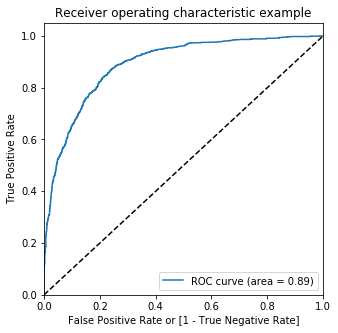

In [125]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [126]:
# Finding the optimal cut off 

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Number  Lead_Score  predicted  0.0  0.1  \
6157          1        0.925135       602557   92.444002          1    1    1   
2090          1        0.845169       639471   84.758386          1    1    1   
1507          0        0.144154       644264   13.969438          0    1    1   
3748          0        0.012775       624284    1.271886          0    1    0   
2835          1        0.877117       632439   88.229748          1    1    1   

      0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
6157    1    1    1    1    1    1    1    1  
2090    1    1    1    1    1    1    1    0  
1507    0    0    0    0    0    0    0    0  
3748    0    0    0    0    0    0    0    0  
2835    1    1    1    1    1    1    1    0

In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.433821  1.000000  0.000000
0.1   0.1  0.630244  0.978261  0.363584
0.2   0.2  0.756098  0.941529  0.614015
0.3   0.3  0.801626  0.889805  0.734061
0.4   0.4  0.807154  0.806597  0.807582
0.5   0.5  0.808780  0.747376  0.855830
0.6   0.6  0.796098  0.675412  0.888570
0.7   0.7  0.774634  0.578711  0.924756
0.8   0.8  0.744390  0.458771  0.963240
0.9   0.9  0.684878  0.291604  0.986215


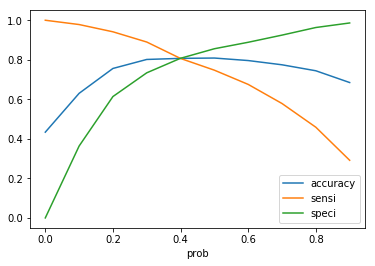

In [128]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [129]:
# From the roc curve it is shown 0.40 is optimal cut off value

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.40 else 0)

y_train_pred_final.head()


Converted  Converted_Prob  Lead_Number  Lead_Score  predicted  0.0  0.1  \
6157          1        0.925135       602557   92.444002          1    1    1   
2090          1        0.845169       639471   84.758386          1    1    1   
1507          0        0.144154       644264   13.969438          0    1    1   
3748          0        0.012775       624284    1.271886          0    1    0   
2835          1        0.877117       632439   88.229748          1    1    1   

      0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
6157    1    1    1    1    1    1    1    1                1  
2090    1    1    1    1    1    1    1    0                1  
1507    0    0    0    0    0    0    0    0                0  
3748    0    0    0    0    0    0    0    0                0  
2835    1    1    1    1    1    1    1    0                1

In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8071544715447154

In [131]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1406,  335],
       [ 258, 1076]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8065967016491754

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.8075818495117748

In [135]:
# Calculate false postive rate - predicting churn when customer does not have churned
print# Positive predictive value 
print (TP / float(TP+FP))

0.7625797306874557


In [136]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7625797306874557


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8449519230769231


# precision and recall scores

In [138]:
from sklearn.metrics import precision_score, recall_score

In [139]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7988782051282052

In [140]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7473763118440779

In [141]:
from sklearn.metrics import precision_recall_curve

In [142]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(6157    1
 2090    1
 1507    0
 3748    0
 2835    1
 5524    1
 9025    0
 1291    0
 119     0
 3518    0
 7051    1
 5748    0
 526     0
 6200    1
 6839    1
 5039    0
 6993    0
 7417    0
 1959    0
 4193    0
 6272    1
 3789    1
 4764    0
 8686    1
 1088    0
 6673    0
 1179    0
 1048    1
 1606    0
 8142    0
        ..
 3       0
 7279    0
 6539    0
 8017    0
 5145    1
 8033    0
 7470    1
 8941    1
 6291    0
 8553    0
 5713    0
 2167    0
 6896    0
 5323    0
 4158    1
 5262    0
 3329    1
 6459    0
 2852    1
 4157    1
 7081    1
 3684    0
 9216    0
 6080    0
 1668    0
 8795    0
 4146    0
 835     1
 127     0
 8379    0
 Name: Converted, Length: 3075, dtype: int64, 6157    1
 2090    1
 1507    0
 3748    0
 2835    1
 5524    1
 9025    1
 1291    0
 119     0
 3518    1
 7051    1
 5748    0
 526     0
 6200    0
 6839    0
 5039    0
 6993    0
 7417    1
 1959    0
 4193    0
 6272    0
 3789    0
 4764    1
 8686    1
 1088    1
 6673    

In [143]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

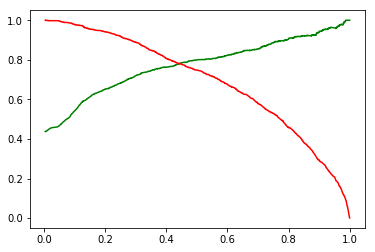

In [144]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [145]:
X_test.columns

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=124)

In [146]:
scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Lead Number  Do Not Email  TotalVisits  Total Time Spent on Website  \
713        653082             0     0.738546                     0.271743   
6706       598338             0    -1.455040                     0.896186   
4822       613707             0     0.738546                     2.106840   
8983       581489             0     0.190150                    -1.155555   
3562       626338             0    -0.358247                    -0.816936   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
713              -0.239739                                    0   
6706             -1.418403                                    0   
4822             -0.239739                                    1   
8983              0.938925                                    1   
3562              0.153149                                    1   

      Lead Origin_Lead Add Form  Lead Source_Facebook  Lead Source_Google  \
713                           0                     0                   1   
6706                          0                     0                   1   
4822                          0                     0                   1   
8983                          0                     0                   1   
3562                          0                     0                   1   

      Lead Source_Olark Chat  \
713                        0   
6706                       0   
4822                       0   
8983                       0   
3562                       0   

                             ...                          \
713                          ...                           
6706                         ...                           
4822                         ...                           
8983                         ...                           
3562                         ...                           

      Last Notable Activity_Email Opened  \
713                                    0   
6706                                   0   
4822                                   1   
8983                                   1   
3562                                   0   

      Last Notable Activity_Email Received  \
713                                      0   
6706                                     0   
4822                                     0   
8983                                     0   
3562                                     0   

      Last Notable Activity_Had a Phone Conversation  \
713                                                0   
6706                                               0   
4822                                               0   
8983                                               0   
3562                                               0   

      Last Notable Activity_Modified  \
713                                1   
6706                               1   
4822                               0   
8983                               0   
3562                               0   

      Last Notable Activity_Olark Chat Conversation  \
713                                               0   
6706                                              0   
4822                                              0   
8983                                              0   
3562                                              0   

      Last Notable Activity_Page Visited on Website  \
713                                               0   
6706                                              0   
4822                                              0   
8983                                              0   
3562                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
713                                0                                  0   
6706                               0                                  0   
4822                               0                                  0   
8983                               0     

In [147]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [148]:
x_test_lead_Number = X_test['Lead Number']

In [149]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
713              0                     0.271743   
6706             0                     0.896186   
4822             0                     2.106840   
8983             0                    -1.155555   
3562             0                    -0.816936   

      Lead Origin_Landing Page Submission  \
713                                     0   
6706                                    0   
4822                                    1   
8983                                    1   
3562                                    1   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
713                                        0                       0   
6706                                       0                       0   
4822                                       0                       0   
8983                                       0                       0   
3562                                       0                       1   

      Last Activity_Unsubscribed  Specialization_Others  \
713                            0                      0   
6706                           0                      1   
4822                           0                      0   
8983                           0                      0   
3562                           0                      0   

      What is your current occupation_Working Professional  \
713                                                   0      
6706                                                  0      
4822                                                  0      
8983                                                  1      
3562                                                  0      

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
713                             1                                   0   
6706                            0                                   0   
4822                            0                                   0   
8983                            1                                   0   
3562                            0                                   0   

      Last Notable Activity_Modified  Last Notable Activity_Unreachable  
713                                1                                  0  
6706                               1                                  0  
4822                               0                                  0  
8983                               0                                  0  
3562                               0                                  0

In [150]:
X_test_sm = sm.add_constant(X_test)

In [151]:
X_test_sm

const  Do Not Email  Total Time Spent on Website  \
713     1.0             0                     0.271743   
6706    1.0             0                     0.896186   
4822    1.0             0                     2.106840   
8983    1.0             0                    -1.155555   
3562    1.0             0                    -0.816936   
8901    1.0             0                     1.942992   
1505    1.0             0                    -1.033579   
6591    1.0             0                     0.854313   
6577    1.0             0                    -0.838782   
434     1.0             0                    -0.083261   
5669    1.0             0                    -0.582087   
4273    1.0             0                    -1.024477   
150     1.0             0                    -0.099646   
7346    1.0             0                     0.515694   
6674    1.0             0                    -0.474676   
159     1.0             0                    -0.359982   
1341    1.0             0                    -0.545676   
1257    1.0             0                    -0.674934   
5071    1.0             0                     0.850672   
5907    1.0             0                     1.362242   
7028    1.0             0                    -0.957117   
6395    1.0             0                     0.750543   
686     1.0             0                     0.563028   
2794    1.0             0                    -0.163365   
937     1.0             0                     0.497489   
626     1.0             1                    -1.184684   
8914    1.0             0                    -1.213812   
8171    1.0             0                     0.785133   
3814    1.0             0                     1.245728   
8114    1.0             0                     1.329473   
...     ...           ...                          ...   
5549    1.0             0                     1.092803   
4305    1.0             0                    -0.538394   
6923    1.0             0                    -0.877013   
3705    1.0             0                     0.969007   
3113    1.0             0                     2.594743   
7543    1.0             0                    -0.126954   
2705    1.0             0                     1.502423   
3791    1.0             0                    -0.771423   
8263    1.0             0                    -0.960758   
5244    1.0             0                    -0.929809   
5815    1.0             0                    -0.441906   
4135    1.0             0                    -0.736832   
1193    1.0             0                     1.273036   
4924    1.0             0                    -1.162837   
8648    1.0             0                     0.637670   
7656    1.0             1                    -0.576626   
3836    1.0             0                     0.628567   
1501    1.0             0                    -1.144632   
6076    1.0             1                     1.069136   
7320    1.0             0                     0.502951   
7771    1.0             0                    -1.113683   
7289    1.0             0                     0.881621   
8274    1.0             0                    -1.195607   
1750    1.0             0                     0.692286   
1078    1.0             0                    -0.376367   
3931    1.0             0                    -0.673114   
6704    1.0             0                    -1.199248   
1486    1.0             0                    -1.124606   
2560    1.0             0                    -0.258032   
6765    1.0             0                    -0.958937   

      Lead Origin_Landing Page Submission  \
713                                     0   
6706                                    0   
4822                                    1   
8983                                    1   
3562                                    1   
8901                                    1   
1505                                    1   
6591                                    0   
6577

In [152]:
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

713     0.769489
6706    0.367345
4822    0.787132
8983    0.877907
3562    0.298883
8901    0.991606
1505    0.098424
6591    0.725049
6577    0.293774
434     0.275729
dtype: float64

In [154]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [155]:
y_test_df = pd.DataFrame(y_test)


In [156]:
y_test_df['LeadNumber'] = x_test_lead_Number

In [157]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [159]:
y_pred_final.head()

Converted  LeadNumber         0
0          1      653082  0.769489
1          0      598338  0.367345
2          1      613707  0.787132
3          0      581489  0.877907
4          1      626338  0.298883

In [160]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [161]:
y_pred_final.head()

Converted  LeadNumber  Converted_Prob
0          1      653082        0.769489
1          0      598338        0.367345
2          1      613707        0.787132
3          0      581489        0.877907
4          1      626338        0.298883

In [162]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadNumber','Converted','Converted_Prob'], axis=1)

In [163]:
y_pred_final.head()

LeadNumber  Converted  Converted_Prob
0      653082          1        0.769489
1      598338          0        0.367345
2      613707          1        0.787132
3      581489          0        0.877907
4      626338          1        0.298883

In [164]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [165]:
y_pred_final.head()

LeadNumber  Converted  Converted_Prob  final_predicted
0      653082          1        0.769489                1
1      598338          0        0.367345                0
2      613707          1        0.787132                1
3      581489          0        0.877907                1
4      626338          1        0.298883                0

In [166]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].apply(lambda x : x*100)

In [167]:
y_pred_final.head()

LeadNumber  Converted  Converted_Prob  final_predicted  Lead_Score
0      653082          1        0.769489                1   76.948920
1      598338          0        0.367345                0   36.734483
2      613707          1        0.787132                1   78.713181
3      581489          0        0.877907                1   87.790731
4      626338          1        0.298883                0   29.888344

In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7792109256449166

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[602, 150],
       [141, 425]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7508833922261484

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.800531914893617

In [199]:
#  Based on above result formulated from RFE Logisitic Regression , ROC Curve Model & precision & recall Model 

# In all three cases we got accuracy score 

# Log RFE  80.8

# ROC Curve : 80.08

# Precision & recall : 79.79

# Precision Value : 

# Log RFE : 79.99

# ROC Curve : 74.5

# Precison & recall : 77.9



In [200]:
# 1.Which are the top three variables in your model which contribute most towards the probability of a lead getting converted

# Answers : Lead Origin ,Total Time Spent on Website, Lead Profile

In [201]:
# 2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?
# Answer : 

# Based on VIF Score :Lead Origin_Landing Page Submission, Last Activity_SMS Sent, Last Notable Activity_Modified


In [202]:
# 3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

# Answer : 


In [203]:
# 4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.
# Answer : Increase Cut-off rate  and target only lead having maximum lead scores 